## Unsupervised Machine Learning

### Feature Scaling

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns

In [2]:
gt = pd.read_csv('CSVs/globalterrorism.csv')
display(gt.shape)
gt.head()

(43793, 19)

,iyear,imonth,iday,more_than_24h,country_txt,city,latitude,longitude,news,suicide,attacktype,attacktype_txt,targtype,targtype_txt,band_name,npeople_attacking,weapon,weapon_txt,nkill
0,1970,3,5,0,United States,San Juan,18.386932,-66.061127,3/5/1970: Unknown Puerto Rican Nationalists as...,0,1,Assassination,4,Military,Other,1,5,Firearms,2
1,1970,3,9,0,United States,Bel Air,39.538940,-76.348479,3/9/1970: A bomb exploded in the car of Ralph ...,0,3,Bombing/Explosion,20,Unknown,Other,2,6,Explosives,2
2,1970,3,20,0,United States,Detroit,42.331685,-83.047924,3/20/1970: Unknown perpetrators shot and kille...,0,1,Assassination,14,Private Citizens & Property,Other,7,5,Firearms,1
3,1970,4,24,0,United States,Baltimore,39.308342,-76.616104,4/24/1970: Three members of the Black Panthers...,0,2,Armed Assault,3,Police,Other,3,5,Firearms,1
4,1970,5,9,0,United States,Sacramento,38.551295,-121.471066,5/9/1970: Sacramento Police Officer Bernard Be...,0,2,Armed Assault,3,Police,Other,40,5,Firearms,1


In [3]:
gt.dtypes

iyear                  int64
imonth                 int64
iday                   int64
more_than_24h          int64
country_txt           object
city                  object
latitude             float64
longitude            float64
news                  object
suicide                int64
attacktype             int64
attacktype_txt        object
targtype               int64
targtype_txt          object
band_name             object
npeople_attacking      int64
weapon                 int64
weapon_txt            object
nkill                  int64
dtype: object

### One Hot Encoding

In [4]:
cols = ['iyear', 'more_than_24h', 'country_txt', 'npeople_attacking', 'suicide', 'attacktype_txt', 'targtype_txt', 'band_name', 'weapon_txt', 'nkill']

gtk = gt[cols].copy()
gtk.dtypes

iyear                 int64
more_than_24h         int64
country_txt          object
npeople_attacking     int64
suicide               int64
attacktype_txt       object
targtype_txt         object
band_name            object
weapon_txt           object
nkill                 int64
dtype: object

In [5]:
cols = ['country_txt', 'attacktype_txt', 'targtype_txt', 'weapon_txt', 'band_name']
gtk = pd.get_dummies(data=gtk, columns=cols)

In [6]:
display(gtk.shape)
gtk.head()

(43793, 109)

,iyear,more_than_24h,npeople_attacking,suicide,nkill,country_txt_Afghanistan,country_txt_Algeria,country_txt_Bangladesh,country_txt_Burundi,country_txt_Cameroon,...,band_name_Other,band_name_Palestinian Extremists,band_name_Revolutionary Armed Forces of Colombia (FARC),band_name_Salafist Group for Preaching and Fighting (GSPC),band_name_Separatists,band_name_Sinai Province of the Islamic State,band_name_Taliban,band_name_Tehrik-i-Taliban Pakistan (TTP),band_name_Tripoli Province of the Islamic State,band_name_Unknown
0,1970,0,1,0,2,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,1970,0,2,0,2,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1970,0,7,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,1970,0,3,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,1970,0,40,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


### Dendrogram

Hierarchical clustering, where we create a hierarchy of clusters. The advantage over k-means is that we do not need to specify the number of clusters. 

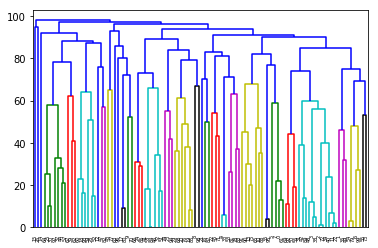

In [7]:
import numpy as np
from sklearn.cluster import AgglomerativeClustering

gtk_columns = [col for col in gtk.columns.values]
gtk_sample = gtk[gtk_columns].sample(n=100)
hier_clust = AgglomerativeClustering(linkage='ward')
gtk_hier = hier_clust.fit(gtk_sample)

from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt

def plot_dendrogram(model, **kwargs):

    # Children of hierarchical clustering
    children = model.children_

    # Distances between each pair of children
    # Since we don't have this information, we can use a uniform one for plotting
    distance = np.arange(children.shape[0])

    # The number of observations contained in each cluster level
    no_of_observations = np.arange(2, children.shape[0]+2)

    # Create linkage matrix and then plot the dendrogram
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)
    
plot_dendrogram(gtk_hier)

A medida que baja de 100 a 0, hace la separación de los grupos que difieren en ese tanto por ciento.

Cuanto más bajo es el porcentaje, los clusters son más pequeños.

### StandardScaler

The value ranges are remarkably different across various categories. It could cause issues in our clustering. The way to reduce the problem is through feature scaling:

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(gtk)
gtk_scale = scaler.transform(gtk)
#gtk_scale

/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/Livia/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  """


In [9]:
# gtk_scale ---> to DataFrame

gtk_scale_df = pd.DataFrame(gtk_scale)

### K-Means Model Evaluation

### Silhouette score

To determine the best number of clusters to use:

In [14]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [10]:
for i in range(3, 50):
    kmeans = KMeans(n_clusters=i)
    gtk_kmeans = kmeans.fit(gtk_scale)

    score = silhouette_score(gtk_scale, gtk_kmeans.labels_, metric='euclidean')
    print("Silhouette score {} clusters: {}".format(i, score))

Silhouette score 3 clusters: 0.07408954366004543
Silhouette score 4 clusters: 0.06381047750862581
Silhouette score 5 clusters: 0.07838222582255748
Silhouette score 6 clusters: 0.0898554928658955
Silhouette score 7 clusters: 0.009383525440229015
Silhouette score 8 clusters: 0.04179550401392972
Silhouette score 9 clusters: 0.052003444821353384
Silhouette score 10 clusters: 0.03658495957417219
Silhouette score 11 clusters: 0.054758485030418726
Silhouette score 12 clusters: 0.042397045504004915
Silhouette score 13 clusters: 0.12087397196371874
Silhouette score 14 clusters: 0.07725151936631787
Silhouette score 15 clusters: 0.06533377291470845
Silhouette score 16 clusters: 0.08223563047380529
Silhouette score 17 clusters: 0.051880215012596154
Silhouette score 18 clusters: 0.09988632833559237
Silhouette score 19 clusters: 0.10330203793706826
Silhouette score 20 clusters: 0.10013433014473969
Silhouette score 21 clusters: 0.10275685197951147
Silhouette score 22 clusters: 0.09245515516775717
Sil

### Elbow curve

To determine the best number of clusters to use:

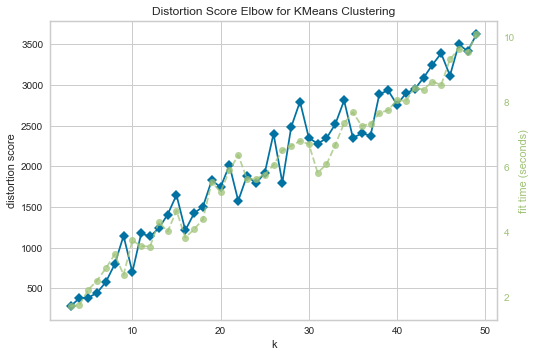

In [11]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(3,50))
visualizer.fit(gtk_scale)
visualizer.poof()

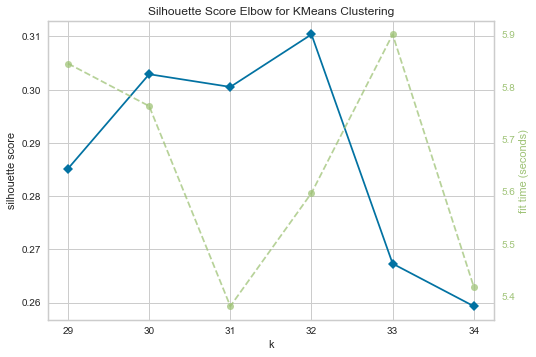

In [18]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(29,35),metric='silhouette')
visualizer.fit(gtk_scale)
visualizer.poof()

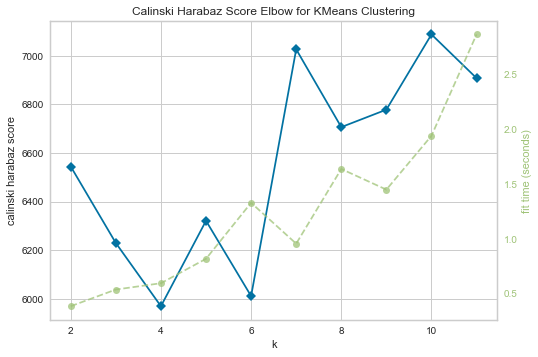

In [21]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(29,35),metric='calinski_harabaz')
visualizer.fit(gtk_scale)
visualizer.poof()

### Elbow curve - AgglomerativeClustering model 

In [ ]:
'''
from sklearn import cluster, datasets

single = cluster.AgglomerativeClustering(linkage='single')
visualizer = KElbowVisualizer(single, k=(2,10))
visualizer.fit(gtk_scale)
visualizer.poof()
'''

In [ ]:
'''
single = cluster.AgglomerativeClustering(linkage='single')
visualizer = KElbowVisualizer(single, k=(2,10),metric='silhouette')
visualizer.fit(gtk_scale)
visualizer.poof()
'''

In [ ]:
'''
single = cluster.AgglomerativeClustering(linkage='single')
visualizer = KElbowVisualizer(single, k=(2,10),metric='calinski_harabaz')
visualizer.fit(gtk_scale)
visualizer.poof()
'''

### Scatter Matrix 

Showing how the clusters are grouped across all the different combinations of variables in the data:

In [26]:
from sklearn import cluster, datasets
kmeans = cluster.KMeans(n_clusters=4)
gtk_clusters = kmeans.fit(gtk_scale_df)

gtk['labels'] = gtk_clusters.labels_ # Create hue

In [ ]:
import seaborn as sns

sns.set(style="ticks", color_codes=True)

sns.pairplot(gtk, hue = 'labels')

KeyboardInterrupt: 

ERROR:root:Invalid alias: The name clear can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name more can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name less can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name man can't be aliased because it is another magic command.


In [ ]:
# AgglomerativeClustering model with 4 clusters
'''
agglo_kmeans = cluster.AgglomerativeClustering(n_clusters=4,linkage='ward') # linkage=single
gtk_clusters = agglo_kmeans.fit(gtk_scale)

gtk['labels_agglomerative'] = gtk_clusters.labels_ # Create hue

sns.set(style="ticks", color_codes=True)

sns.pairplot(gtk, hue = 'labels_agglomerative')
'''

### Applying PCA transform

Plotting the first two principle components with the plot point colors determined by cluster:

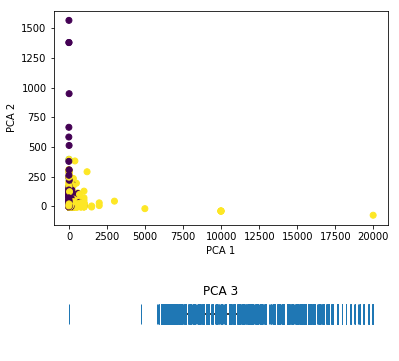

In [13]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(gtk)
pca_gtk = pca.transform(gtk)

fig = plt.figure(figsize=(6, 6))
ax = [plt.subplot2grid((6, 1), (0, 0), rowspan=4), plt.subplot2grid((6, 1), (5, 0))]

ax[0].scatter(pca_gtk[:, 0], pca_gtk[:, 1], c=gtk.labels)
ax[0].set_xlabel("PCA 1")
ax[0].set_ylabel("PCA 2")

ax[1].set_title('PCA 3', pad=-5)
ax[1].hlines(1, -7, 10)
y = np.ones(pca_gtk.shape[0])
ax[1].plot(pca_gtk[:, 2], y, '|', ms='20')
ax[1].axis('off')

plt.show()

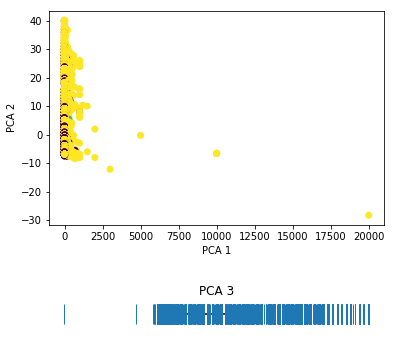

In [41]:
fig = plt.figure(figsize=(6, 6))
ax = [plt.subplot2grid((6, 1), (0, 0), rowspan=4), plt.subplot2grid((6, 1), (5, 0))]

ax[0].scatter(pca_gtk[:, 0], pca_gtk[:, 2], c=gtk.labels)
ax[0].set_xlabel("PCA 1")
ax[0].set_ylabel("PCA 2")

ax[1].set_title('PCA 3', pad=-5)
ax[1].hlines(1, -7, 10)
y = np.ones(pca_gtk.shape[0])
ax[1].plot(pca_gtk[:, 2], y, '|', ms='20')
ax[1].axis('off')

plt.show()

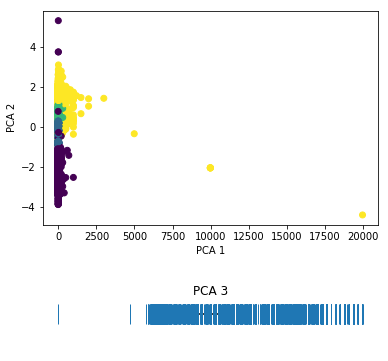

In [40]:
fig = plt.figure(figsize=(6, 6))
ax = [plt.subplot2grid((6, 1), (0, 0), rowspan=4), plt.subplot2grid((6, 1), (5, 0))]

ax[0].scatter(pca_gtk[:, 0], pca_gtk[:, 3], c=gtk.labels)
ax[0].set_xlabel("PCA 1")
ax[0].set_ylabel("PCA 2")

ax[1].set_title('PCA 3', pad=-5)
ax[1].hlines(1, -7, 10)
y = np.ones(pca_gtk.shape[0])
ax[1].plot(pca_gtk[:, 2], y, '|', ms='20')
ax[1].axis('off')

plt.show()

### Series of t-SNE plots

Showing the clusters at a variety of perplexities:

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3291, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-9-e88f188b8ded>", line 6, in <module>
    x_embedded = tsne.fit_transform(gtk_scale)
  File "/usr/local/lib/python3.7/site-packages/sklearn/manifold/t_sne.py", line 894, in fit_transform
    embedding = self._fit(X)
  File "/usr/local/lib/python3.7/site-packages/sklearn/manifold/t_sne.py", line 806, in _fit
    skip_num_points=skip_num_points)
  File "/usr/local/lib/python3.7/site-packages/sklearn/manifold/t_sne.py", line 848, in _tsne
    **opt_args)
  File "/usr/local/lib/python3.7/site-packages/sklearn/manifold/t_sne.py", line 357, in _gradient_descent
    error, grad = objective(p, *args, **kwargs)
  File "/usr/local/lib/python3.7/site-packages/sklearn/manifold/t_sne.py", line 261, in _kl_divergence_bh
    compute_error=compute_error)
KeyboardInterrupt

During handling

KeyboardInterrupt: 

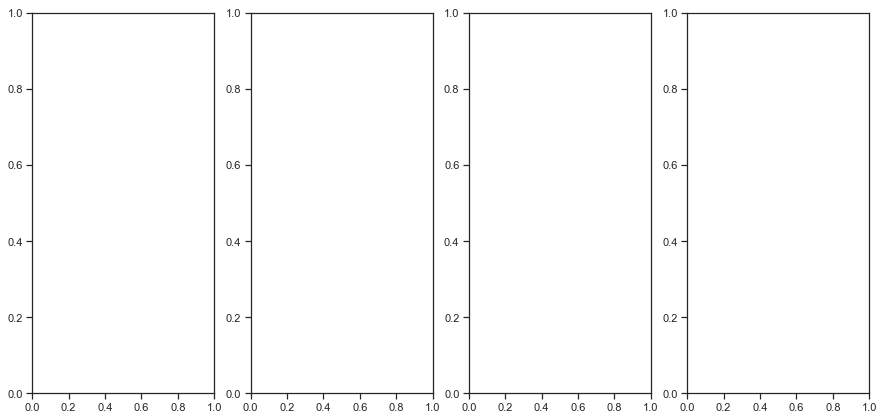

In [9]:
from sklearn.manifold import TSNE

'''
fig, ax = plt.subplots(1, 4, figsize=(15, 7))
for i, perp in enumerate([5, 30, 50, 100]):
    tsne = TSNE(perplexity=perp)
    x_embedded = tsne.fit_transform(gtk_scale)
    ax[i].scatter(x_embedded[:, 0], x_embedded[:, 1], c=gtk['labels'])
    ax[i].set_title("Perplexity = {}".format(perp))
    
plt.show()
'''

## K-means (K = 4)

In [15]:
kmeans = KMeans(n_clusters=4)

gtk_clusters = kmeans.fit(gtk_scale) # Using Standard Scaler
#gtk_clusters.cluster_centers_

Using fit_predict, we can assign a cluster to each observation and then add this information back to our dataset:

In [16]:
gtk['Cluster'] = gtk_clusters.fit_predict(gtk_scale)
gtk.Cluster.value_counts()

2    26154
1    20725
0      546
3      334
Name: Cluster, dtype: int64

The majority of the data is in the cluster 2, while clusters 0 and 3 has few observations.

Plotting the data will not provide us with a great deal of meaningful information. 
This is because the data has 10 dimensions. 

Therefore, creating a two dimensional plot will only capture some of the information and might not show completely separable clusters. 
However, it is interesting to look at some summary statistics for our clusters:

#### Attack Types in each Cluster

In [20]:
gt[gtk.Cluster == 0]['attacktype_txt'].value_counts()

Armed Assault                     217
Bombing/Explosion                 194
Assassination                     101
Unknown                            18
Hostage Taking (Kidnapping)        11
Facility/Infrastructure Attack      4
Hijacking                           1
Name: attacktype_txt, dtype: int64

In [21]:
gt[gtk.Cluster == 1]['attacktype_txt'].value_counts()

Bombing/Explosion                      19899
Assassination                            575
Armed Assault                            133
Hostage Taking (Barricade Incident)       57
Hostage Taking (Kidnapping)               50
Hijacking                                  9
Unknown                                    2
Name: attacktype_txt, dtype: int64

In [22]:
gt[gtk.Cluster == 2]['attacktype_txt'].value_counts()

Armed Assault                          15979
Assassination                           5030
Hostage Taking (Kidnapping)             2264
Unknown                                 2159
Facility/Infrastructure Attack           295
Hostage Taking (Barricade Incident)      125
Bombing/Explosion                        113
Unarmed Assault                          102
Hijacking                                 87
Name: attacktype_txt, dtype: int64

In [23]:
gt[gtk.Cluster == 3]['attacktype_txt'].value_counts()

Assassination                     256
Armed Assault                      43
Bombing/Explosion                  22
Hostage Taking (Kidnapping)         6
Unknown                             2
Facility/Infrastructure Attack      2
Hijacking                           2
Unarmed Assault                     1
Name: attacktype_txt, dtype: int64

#### Mean number of kills & number of people attacking in each Cluster

In [24]:
gtk.groupby(['Cluster'])['nkill'].mean()

Cluster
0    6.307692
1    5.442895
2    4.134205
3    1.508982
Name: nkill, dtype: float64

In [25]:
gtk.groupby(['Cluster'])['npeople_attacking'].mean()

Cluster
0    15.194139
1    11.168492
2    20.348704
3     2.739521
Name: npeople_attacking, dtype: float64

## Clustering with DBSCAN


In [28]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5)
gtk_dbscan = dbscan.fit(gtk_scale)
gtk['labels_DBSCAN'] = gtk_dbscan.labels_

gtk['labels_DBSCAN'].value_counts()

-1      7524
 270    3324
 256     901
 216     773
 318     772
 331     759
 210     628
 429     597
 435     559
 305     539
 302     520
 134     479
 221     469
 219     451
 241     399
 272     377
 320     371
 147     349
 337     332
 223     331
 175     330
 393     325
 267     306
 612     276
 255     272
 179     267
 355     251
 251     249
 208     248
 579     247
        ... 
 902       5
 899       5
 851       5
 883       5
 884       5
 962       5
 341       5
 725       5
 789       5
 592       5
 931       5
 173       5
 814       5
 461       5
 621       5
 717       5
 110       5
 782       5
 484       5
 452       5
 846       5
 963       5
 878       5
 942       5
 47        5
 143       5
 335       5
 68        5
 80        5
 959       5
Name: labels_DBSCAN, Length: 973, dtype: int64

### K-Means vs DBSCAN

Text(0, 0.5, 'Number of Kills')

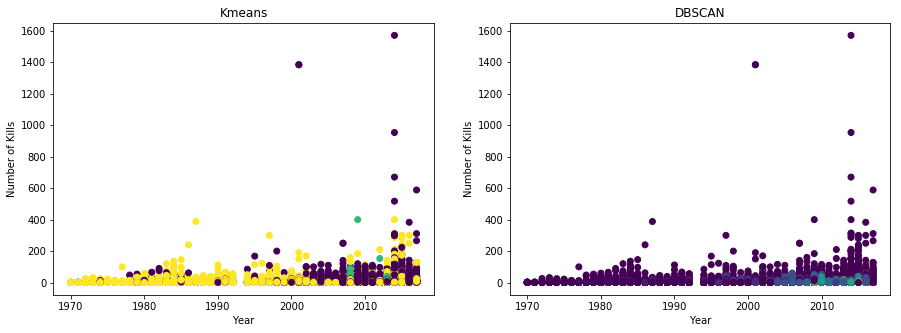

In [37]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

ax1.scatter(gtk['iyear'], gtk['nkill'], c = gtk['labels'])
ax1.set_title("Kmeans")
ax1.set_xlabel("Year")
ax1.set_ylabel("Number of Kills")

ax2.scatter(gtk['iyear'], gtk['nkill'], c = gtk['labels_DBSCAN'])
ax2.set_title("DBSCAN")
ax2.set_xlabel("Year")
ax2.set_ylabel("Number of Kills")

Text(0, 0.5, 'Number of Kills')

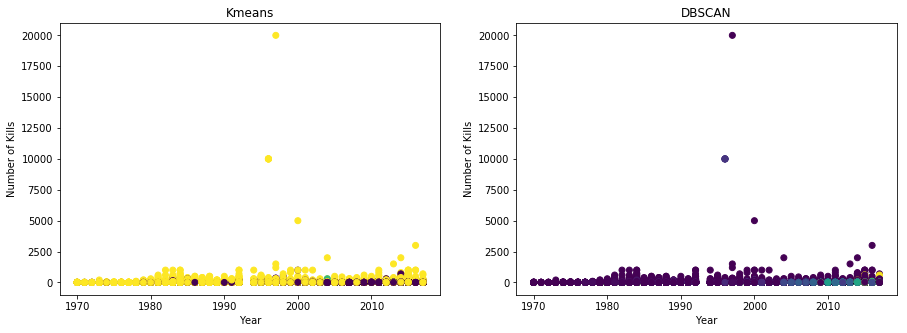

In [38]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

ax1.scatter(gtk['iyear'], gtk['npeople_attacking'], c = gtk['labels'])
ax1.set_title("Kmeans")
ax1.set_xlabel("Year")
ax1.set_ylabel("Number of Kills")

ax2.scatter(gtk['iyear'], gtk['npeople_attacking'], c = gtk['labels_DBSCAN'])
ax2.set_title("DBSCAN")
ax2.set_xlabel("Year")
ax2.set_ylabel("Number of Kills")

Text(0, 0.5, 'Number of Kills')

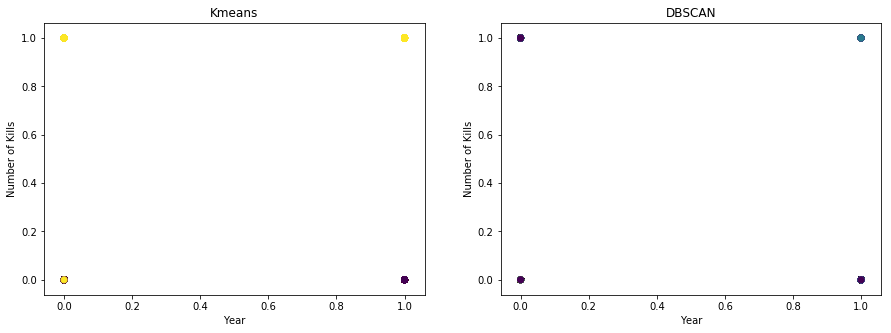

In [42]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

ax1.scatter(gtk['country_txt_Afghanistan'], gtk['weapon_txt_Firearms'], c = gtk['labels'])
ax1.set_title("Kmeans")
ax1.set_xlabel("Year")
ax1.set_ylabel("Number of Kills")

ax2.scatter(gtk['country_txt_Afghanistan'], gtk['weapon_txt_Firearms'], c = gtk['labels_DBSCAN'])
ax2.set_title("DBSCAN")
ax2.set_xlabel("Year")
ax2.set_ylabel("Number of Kills")